In [2]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import requests
#import finnhub
from pprint import pprint
from datetime import datetime
from config import *

In [3]:
states = []
cases = []
deaths = []


r = requests.get(f'https://finnhub.io/api/v1/covid19/us?token={Api_key}').json()
for i in range(len(r)):
    result=r[i]
    states.append(result['state'])
    cases.append(result['case'])
    deaths.append(result['death'])

pprint(r)

[{'case': 418793,
  'death': 32658,
  'state': 'New York',
  'updated': '2020-07-29 22:01:15'},
 {'case': 180766,
  'death': 15886,
  'state': 'New Jersey',
  'updated': '2020-07-29 22:01:15'},
 {'case': 483845,
  'death': 8885,
  'state': 'California',
  'updated': '2020-07-29 22:01:15'},
 {'case': 88976,
  'death': 6430,
  'state': 'Michigan',
  'updated': '2020-07-29 22:01:15'},
 {'case': 451423,
  'death': 6333,
  'state': 'Florida',
  'updated': '2020-07-29 22:01:15'},
 {'case': 116684,
  'death': 8580,
  'state': 'Massachusetts',
  'updated': '2020-07-29 22:01:15'},
 {'case': 55197,
  'death': 1562,
  'state': 'Washington',
  'updated': '2020-07-29 22:01:15'},
 {'case': 112773,
  'death': 3883,
  'state': 'Louisiana',
  'updated': '2020-07-29 22:01:15'},
 {'case': 175124,
  'death': 7463,
  'state': 'Illinois',
  'updated': '2020-07-29 22:01:15'},
 {'case': 114888,
  'death': 7167,
  'state': 'Pennsylvania',
  'updated': '2020-07-29 22:01:15'},
 {'case': 175052,
  'death': 3563,


In [4]:
state_dict = {
    "States" : states,
    "Cases" : cases,
    "Deaths" : deaths
}

covid_df = pd.DataFrame(state_dict)

#dow_high_df['Dow 52 Week High Date'] = pd.to_datetime(dow_high_df['Dow 52 Week High Date'])

covid_df

,States,Cases,Deaths
0,New York,418793,32658
1,New Jersey,180766,15886
2,California,483845,8885
3,Michigan,88976,6430
4,Florida,451423,6333
...,...,...,...
57,Wuhan Evacuee,4,0
58,Northern Mariana Islands,31,2
59,US Military,37824,58
60,Federal Bureau of Prisons,11692,104


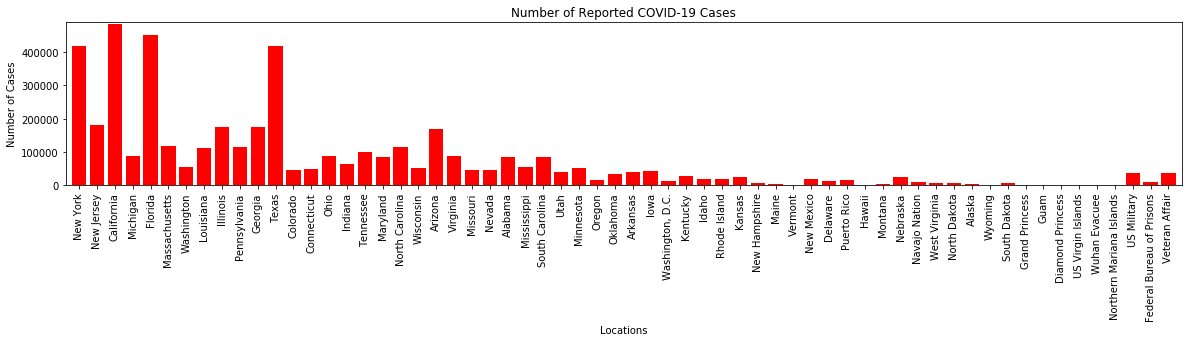

In [31]:
plt.figure(figsize=(20,3))
x_axis = covid_df['States']
y_axis = covid_df['Cases']

plt.bar(x_axis, y_axis, color='r', align="center",)


tick_locations = [value for value in x_axis] 
plt.xticks(tick_locations,states,rotation = 'vertical')


plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(y_axis)+5000)

plt.title("Number of Reported COVID-19 Cases")
plt.xlabel("Locations")
plt.ylabel("Number of Cases")
plt.savefig('Figures/Number of Reported COVID-19 Cases')
plt.show()

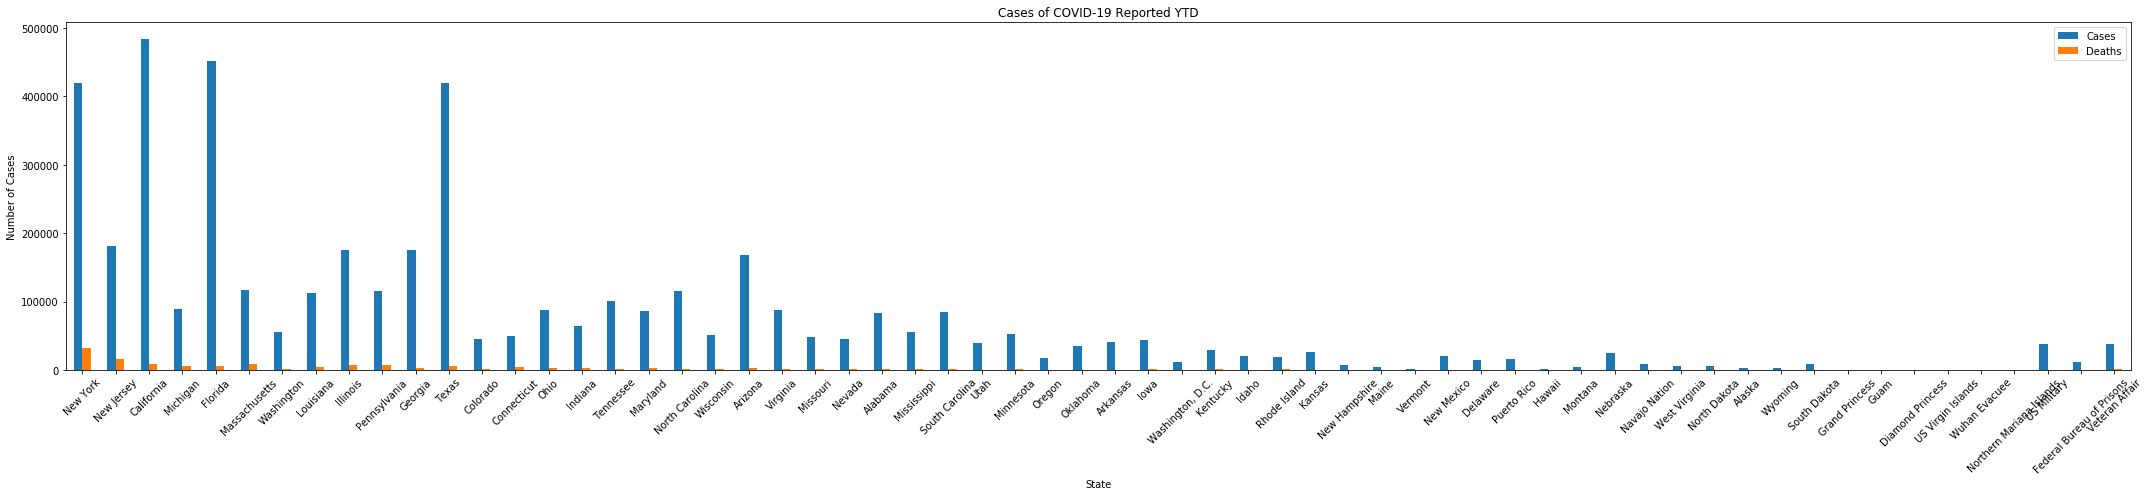

In [6]:
multi_plot = covid_df.plot(kind='bar',figsize=(30,7))
multi_plot.set_xticklabels(covid_df['States'],rotation=45)

plt.title("Cases of COVID-19 Reported YTD")
plt.xlabel("State")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

In [7]:
Daily_State_Count = pd.read_csv('Resources/us_counties_covid19_daily.csv')

Daily_State_Count.head()

Daily_State_Count.describe()


,fips,cases,deaths
count,349985.000000,353568.000000,353568.000000
mean,30894.289915,555.445561,27.939729
std,16119.490698,4362.965552,366.432188
min,1001.000000,0.000000,0.000000
25%,18133.000000,7.000000,0.000000
50%,29147.000000,35.000000,1.000000
75%,46053.000000,169.000000,5.000000
max,78030.000000,226388.000000,22882.000000


In [8]:
grouped_df1 = Daily_State_Count.groupby("date").sum()

grouped_df1.head()



,fips,cases,deaths
date,,,
2020-01-21,53061.0,1,0
2020-01-22,53061.0,1,0
2020-01-23,53061.0,1,0
2020-01-24,70092.0,2,0
2020-01-25,76151.0,3,0


In [11]:
date_covid = grouped_df1.loc[(grouped_df1.index>='2020-03-01')&(grouped_df1.index<='2020-03-31')]

date_covid


,fips,cases,deaths
date,,,
2020-03-01,526283.0,88,3
2020-03-02,662647.0,104,6
2020-03-03,705843.0,125,10
2020-03-04,877129.0,161,12
2020-03-05,1149865.0,228,12
2020-03-06,1881392.0,311,15
2020-03-07,2400681.0,428,19
2020-03-08,2958807.0,547,22
2020-03-09,3445851.0,748,26


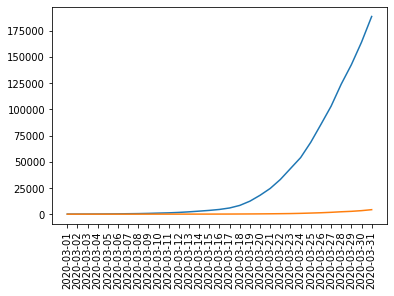

In [12]:
x_axis = date_covid.index
y_axis = date_covid['cases']
y_axis2 = date_covid['deaths']

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis2)
plt.xticks(rotation='vertical')
plt.show()



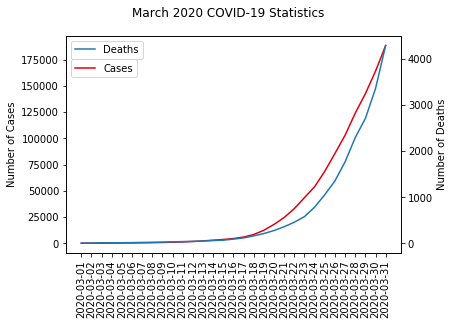

In [30]:
fig, ax1 = plt.subplots()

fig.suptitle('March 2020 COVID-19 Statistics')

ax1.plot(x_axis,y_axis, color="#dd0011",label='Cases')
plt.xticks(rotation='vertical')
plt.legend(loc='center left',bbox_to_anchor=(0,.85))
ax2 = ax1.twinx()
ax2.plot(x_axis, y_axis2,label='Deaths')
ax2.tick_params(axis='y')
ax1.set_ylabel("Number of Cases")
ax2.set_ylabel("Number of Deaths")
plt.legend(loc='best')
plt.show()